# Exp-4 Contrast Enhancement and Spatial Filtering

Name : N U Praneeth Reddy

Reg.No : 21BAI1500

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Grayscale Image')

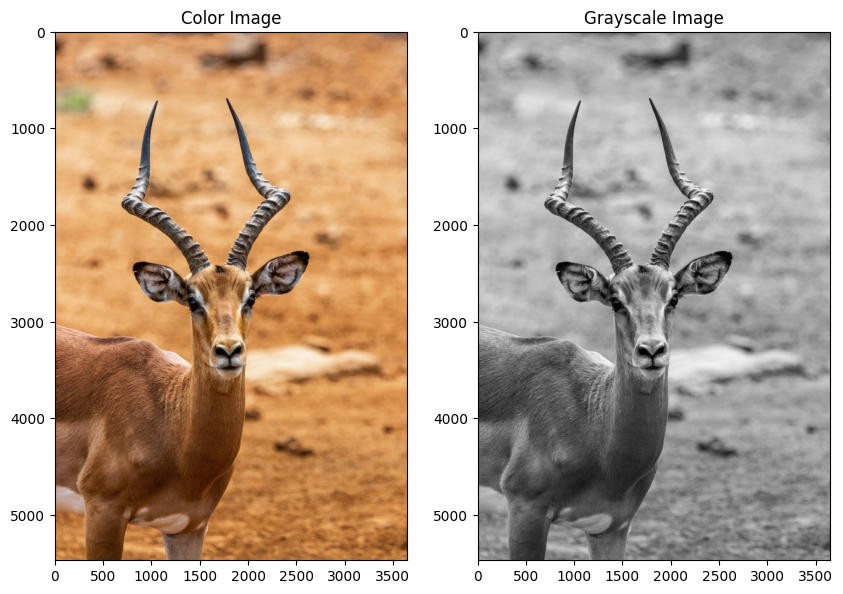

In [2]:
#Read the image
img_bgr = cv2.imread("deeer.jpg")
gray_image = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(10,7))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.title("Color Image")

plt.subplot(1, 2, 2)
plt.imshow(gray_image, cmap='gray')
plt.title("Grayscale Image")

## Histogram Equalization

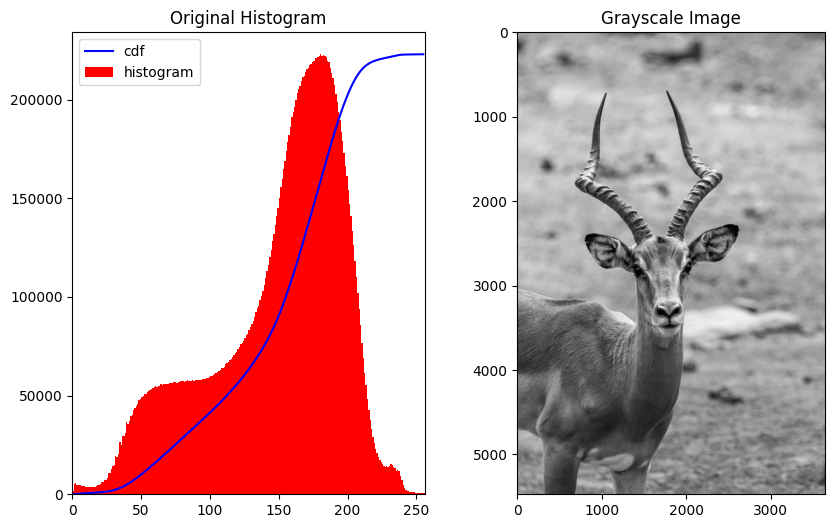

In [3]:
plt.figure(figsize=(10,6))
plt.subplot(1, 2, 1)
hist, bins = np.histogram(gray_image.flatten(), 256, [0, 256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color='b')
plt.hist(gray_image.flatten(), 256, [0, 256], color='r')
plt.xlim([0, 256])
plt.legend(('cdf', 'histogram'), loc='upper left')
plt.title("Original Histogram")

plt.subplot(1, 2, 2)
plt.imshow(gray_image, cmap='gray')
plt.title("Grayscale Image")

plt.show()

In [4]:
# Masking values in the cumulative distribution function
masked_cdf = np.ma.masked_equal(cdf, 0)
normalized_cdf = (masked_cdf - masked_cdf.min()) * 255 / (masked_cdf.max() - masked_cdf.min())
equalized_cdf = np.ma.filled(normalized_cdf, 0).astype('uint8')

# Performing histogram equalization on the grayscale image
equalized_image = equalized_cdf[gray_image]

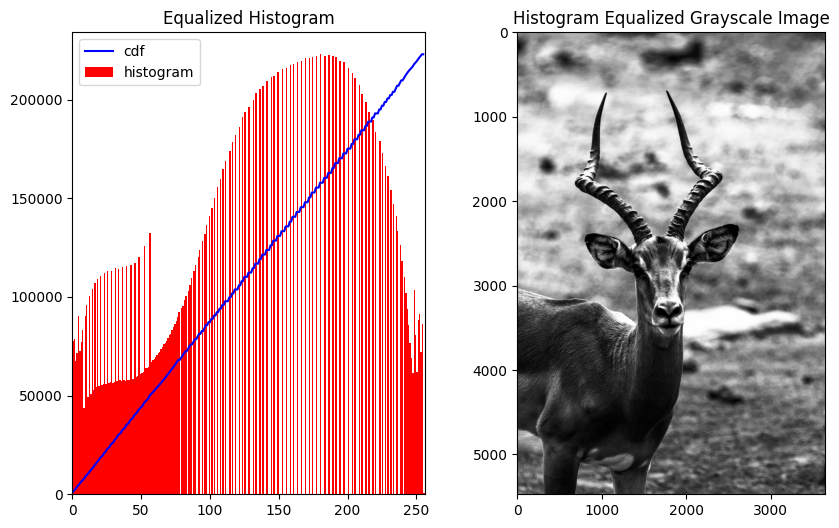

In [5]:
# Plotting the equalized and the original histogram
plt.figure(figsize=(10,6))
plt.subplot(1, 2, 1)
hist, bins = np.histogram(equalized_image.flatten(), 256, [0, 256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color='b')
plt.hist(equalized_image.flatten(), 256, [0, 256], color='r')
plt.xlim([0, 256])
plt.legend(('cdf', 'histogram'), loc='upper left')
plt.title("Equalized Histogram")
# Displaying the original and histogram-equalized grayscale images
plt.subplot(1, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title("Histogram Equalized Grayscale Image")

plt.show()

Text(0.5, 1.0, 'Histogram Equalized Gray Image')

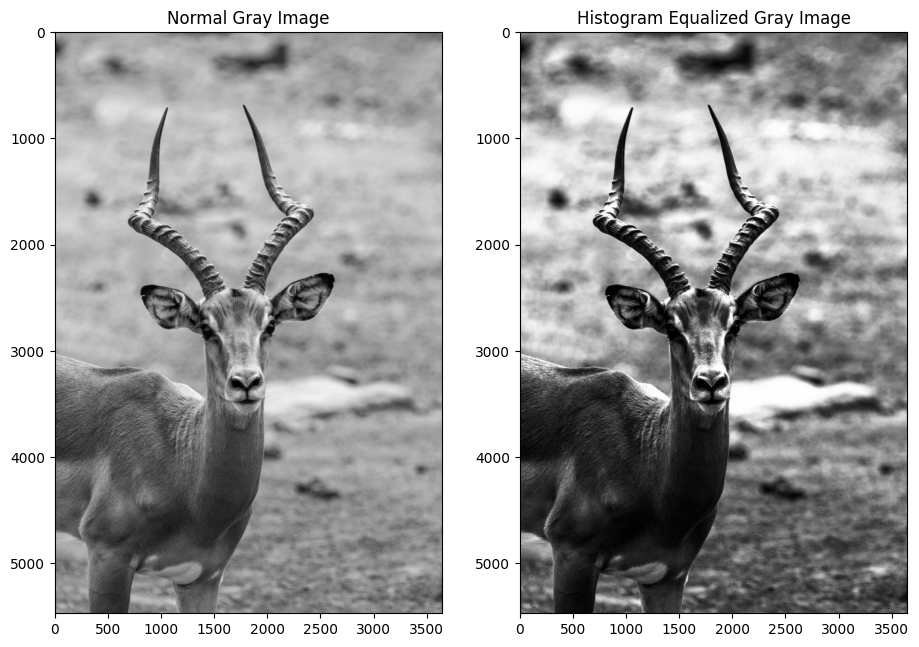

In [6]:
plt.figure(figsize=(11,8))
plt.subplot(1,2,1)
plt.imshow(gray_image,"gray")
plt.title ("Normal Gray Image")
plt.subplot(1,2,2)
plt.imshow(equalized_image,"gray")
plt.title ("Histogram Equalized Gray Image")

## Image Smoothening

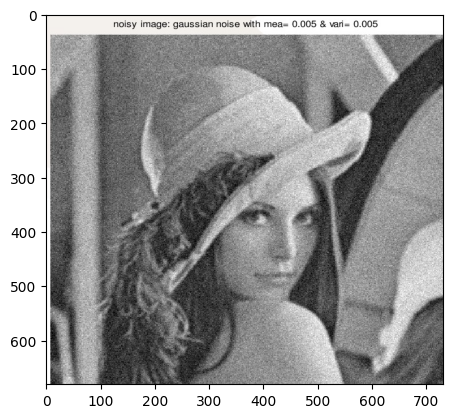

In [7]:
noisy_image = cv2.imread("noisy_img.jpg")
plt.imshow(noisy_image)

## Ideal Filter

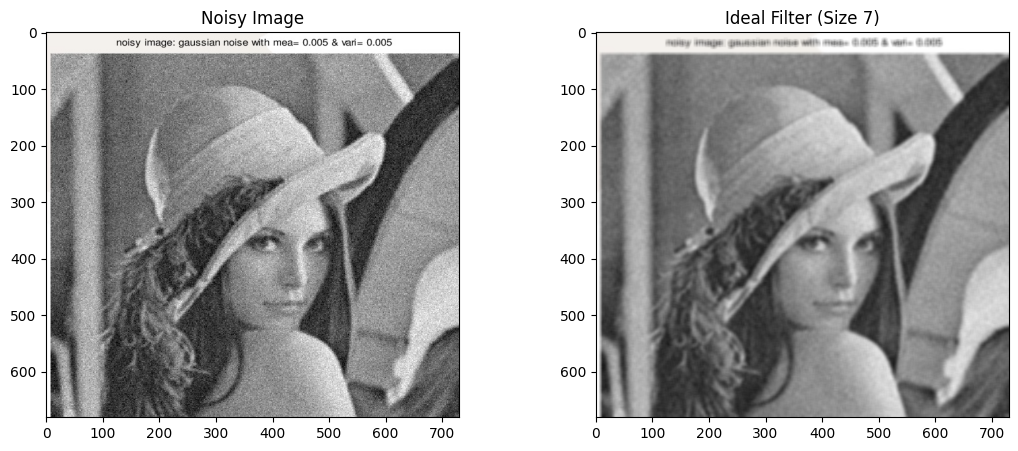

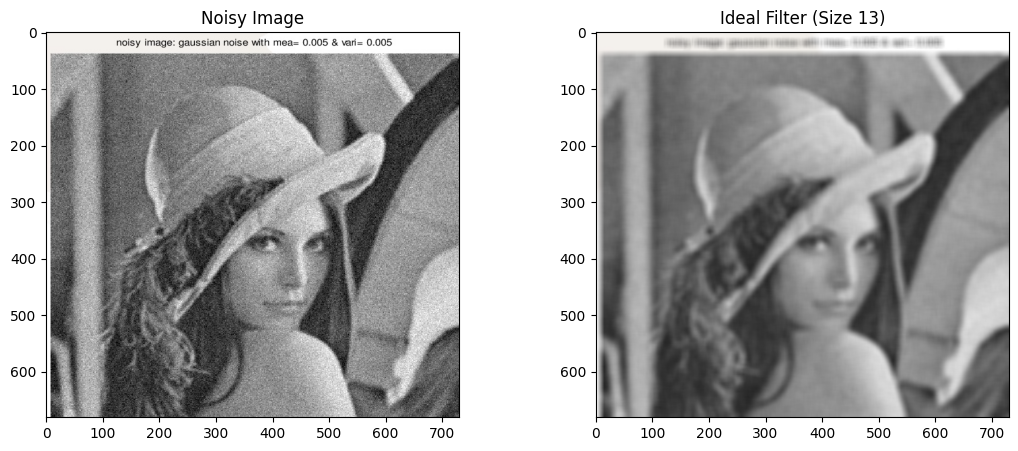

In [8]:
# Define different kernel sizes for the ideal filter
kernel_sizes = [7, 13]

for size in kernel_sizes:
    # Create the ideal kernel for the specified size
    ideal_kernel = np.ones((size, size), np.float32) / (size * size)

    # Apply the ideal filter to the noisy image
    smoothed_ideal = cv2.filter2D(noisy_image, -1, ideal_kernel)

    # Plot the original noisy image
    plt.figure(figsize=(13, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(noisy_image, cmap='gray')
    plt.title("Noisy Image")

    # Plot the result of applying the ideal filter
    plt.subplot(1, 2, 2)
    plt.imshow(smoothed_ideal, cmap='gray')
    plt.title(f"Ideal Filter (Size {size})")

    plt.show()


## Gaussian Filter

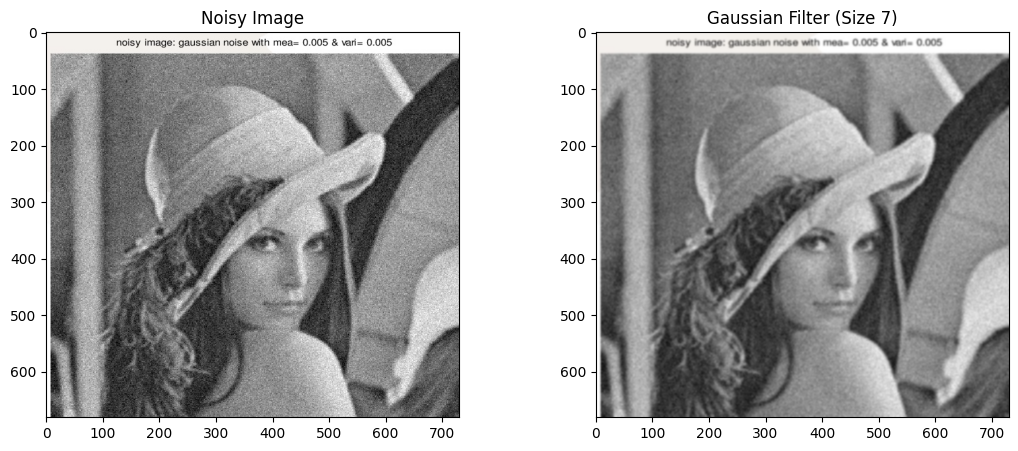

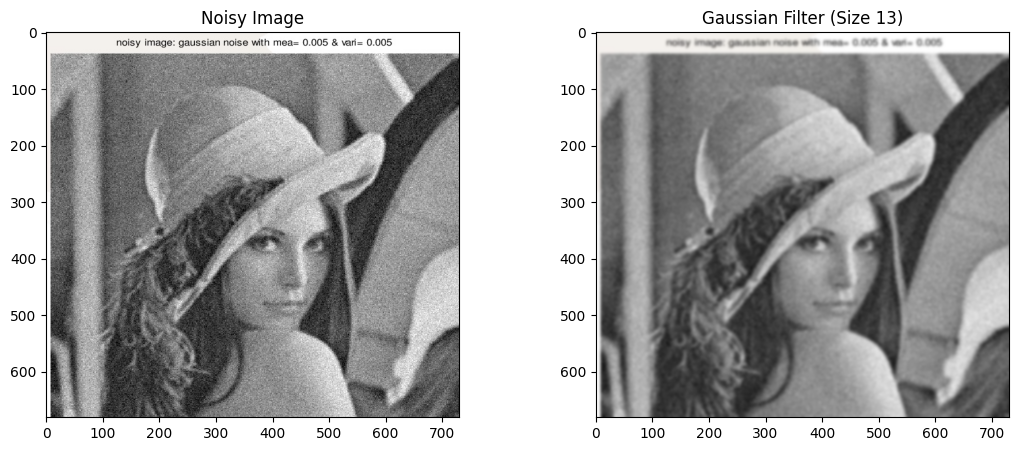

In [9]:
# Define different kernel sizes for the Gaussian filter
gaussian_kernel_sizes = [7, 13]

for size in gaussian_kernel_sizes:
    # Apply Gaussian filter to the noisy image with the specified kernel size
    smoothed_gaussian = cv2.GaussianBlur(noisy_image, (size, size), 0)

    # Plot the original noisy image
    plt.figure(figsize=(13, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(noisy_image, cmap='gray')
    plt.title("Noisy Image")

    # Plot the result of applying the Gaussian filter
    plt.subplot(1, 2, 2)
    plt.imshow(smoothed_gaussian, cmap='gray')
    plt.title(f"Gaussian Filter (Size {size})")

    plt.show()


## Image Sharpening

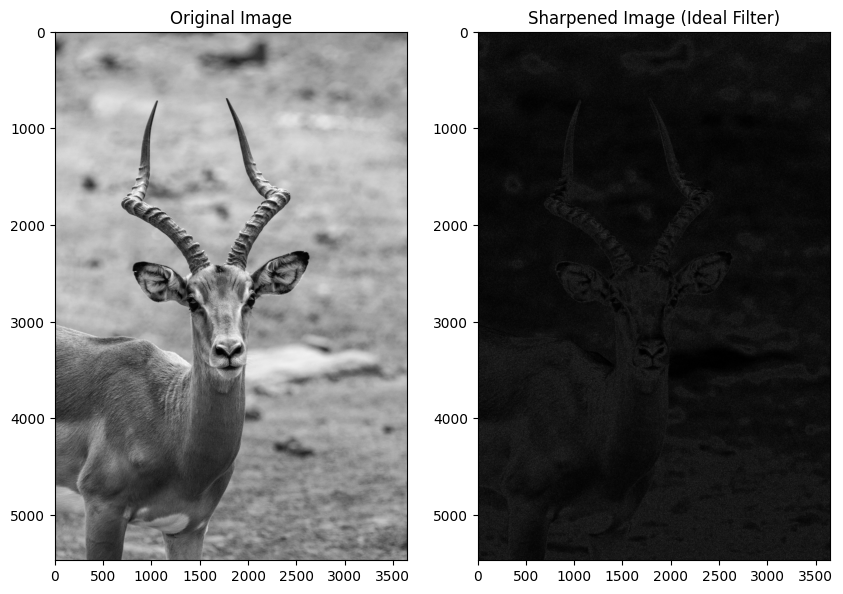

In [10]:
# Define the kernel values for the sharpening filter
sharpening_kernel = np.array([[0, 1, 0],
                              [1, -4, 1],
                              [0, 1, 0]])

# Apply the sharpening filter to the grayscale image
sharpened_image_ideal = cv2.filter2D(gray_image, -1, sharpening_kernel)

# Plot the original grayscale image and the sharpened image using the ideal filter
plt.figure(figsize=(10, 7))
plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(sharpened_image_ideal, cmap='gray')
plt.title("Sharpened Image (Ideal Filter)")

plt.show()
